redukcja wymiarowości (PCA)
redukcja liczby cech - np. jak mamy od cholery kolumn to możemy sobie to zmniejszyć - w celu zmniejszenia złożoności obliczeniowej, no a czasami tak po prostu "wypada", bo są dane, które zaszumiają albo są po prostu niepotrzebne
nie służy do zwiększenia skuteczności uczenia - tylko stricte do zmniejszenia złożoności, żeby skuteczność była taka sam, ale liczyło się szybciej 

jak on działa?
dążymy do zwiększenia zmienności - wyznaczamy nowe osie dla zbioru danych przedstawionych np. na dwuwymiarowym układzie współrzędnych

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [2]:
#załadowanie zbioru digits
digits = load_digits()
X = digits.data
y = digits.target

(-0.5, 7.5, 7.5, -0.5)

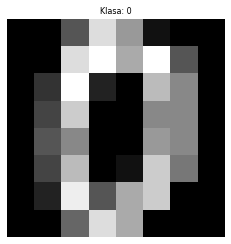

In [3]:
#wyświetlenie pojedyńczego elementu ze zbioru, w tym przypadku o indeksie 0
sample_image = digits.images[0]

plt.imshow(sample_image, cmap='gray')
plt.title(f'Klasa: {digits.target[0]}', fontsize = 8)
plt.axis("off")

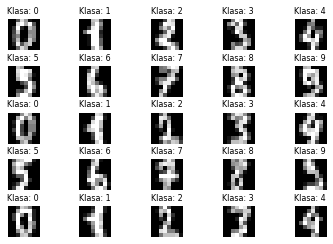

In [10]:
#wykorzystując pętlę for i polecenie subplot wyświetl 25 elementów zbioru w 5 kolumnach i 5 wierszach
for i in range(25):
    plt.subplot(5, 5, i+1) #numeracja musi być od 1
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Klasa: {digits.target[i]}', fontsize = 8)
    plt.axis("off")
    #todo
    

mamy zbiór obrazków, który można przedstawić w tabeli, w której będzie tyle wierszy ile jest cyferek i tyle kolumn ile jest pikseli (czyli 64) 

In [11]:
#uruchomienie PCA
pca = PCA()
X_r = pca.fit(X).transform(X)

In [12]:
explained_variance = pca.explained_variance_ratio_
print("Wyjaśniona wariancja:\n", explained_variance)

Wyjaśniona wariancja:
 [1.48905936e-01 1.36187712e-01 1.17945938e-01 8.40997942e-02
 5.78241466e-02 4.91691032e-02 4.31598701e-02 3.66137258e-02
 3.35324810e-02 3.07880621e-02 2.37234084e-02 2.27269657e-02
 1.82186331e-02 1.77385494e-02 1.46710109e-02 1.40971560e-02
 1.31858920e-02 1.24813782e-02 1.01771796e-02 9.05617439e-03
 8.89538461e-03 7.97123157e-03 7.67493255e-03 7.22903569e-03
 6.95888851e-03 5.96081458e-03 5.75614688e-03 5.15157582e-03
 4.89539777e-03 4.28887968e-03 3.73606048e-03 3.53274223e-03
 3.36683986e-03 3.28029851e-03 3.08320884e-03 2.93778629e-03
 2.56588609e-03 2.27742397e-03 2.22277922e-03 2.11430393e-03
 1.89909062e-03 1.58652907e-03 1.51159934e-03 1.40578764e-03
 1.16622290e-03 1.07492521e-03 9.64053065e-04 7.74630271e-04
 5.57211553e-04 4.04330693e-04 2.09916327e-04 8.24797098e-05
 5.25149980e-05 5.05243719e-05 3.29961363e-05 1.24365445e-05
 7.04827911e-06 3.01432139e-06 1.06230800e-06 5.50074587e-07
 3.42905702e-07 9.50687638e-34 9.50687638e-34 9.36179501e-34]


ta tabela ma tyle elementów ile jest pikseli w obrazku 

In [15]:
#zsumuj listę explained_variance

explained_variance_sum = sum(explained_variance)

explained_variance_sum

1.0000000000000002

sumuje się do 1, bo każda cecha wyjaśnia jakiś procent całości (czyli 100%)

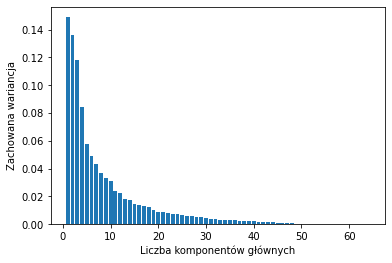

In [13]:
x_axis_values = list(range(1,len(explained_variance)+1))
plt.bar(x_axis_values, explained_variance)
plt.xlabel("Liczba komponentów głównych")
plt.ylabel("Zachowana wariancja")
plt.show()

on stworzył zupełnie nowe 64 cechy
i ta pierwsza cecha wyjaśnia ok 15% calości, druga ok 13,5% etc. 
ale czym dokładnie są te cechy? nie wiadomo - są wypadkową wyjściowych cech, ale nie jesteśmy ich w stanie nazwać (np. nie odpowiadają wiekowi, płci ani nic) 